### Data Exploration

In [29]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
# Read Indeed Dataset and store into Pandas data frame
indeed_df = pd.read_csv("./indeed_job_dataset.csv")
indeed_df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
indeed_df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry', 'python', 'sql',
       'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java',
       'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

#### Removing the following columns
* Link column
* Date since posted
* Description

In [8]:
# Dropping unusable columns
indeed_df = indeed_df.drop(columns = ["Unnamed: 0", "Link", "Date_Since_Posted", "Description"])

In [72]:
# Checking DataFrame
indeed_df.columns

Index(['Job_Title', 'Queried_Salary', 'Job_Type', 'Skill', 'No_of_Skills',
       'Company', 'No_of_Reviews', 'No_of_Stars', 'Location',
       'Company_Revenue', 'Company_Employees', 'Company_Industry', 'python',
       'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC',
       'NC', 'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [27]:
# Seperating my rows to clean
suzy_col = indeed_df.loc[:, ['No_of_Reviews','Company_Industry', 'IL', 'WA', 'MD', 'DC', 'NC',
       'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries']]

In [28]:
# Checking DataFrame
suzy_col

,No_of_Reviews,Company_Industry,IL,WA,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,3301.0,Health Care,0,0,0,0,0,1,0,0,0,1,0,0
1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
2,62.0,NaN,0,0,0,0,0,1,0,0,0,0,0,0
3,158.0,Government,0,0,0,1,0,0,0,0,0,0,0,1
4,495.0,Banks and Financial Services,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0
5711,31.0,Human Resources and Staffing,0,0,0,0,0,0,0,0,0,0,0,1
5712,21159.0,Banks and Financial Services,0,0,0,0,0,1,0,0,1,0,0,0
5713,6791.0,Banks and Financial Services,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
# Filling compant industry NaNs with Not Listed
suzy_col['Company_Industry'] = suzy_col['Company_Industry'].fillna('Not Listed')

In [73]:
# Filling No_of_Reviews NaNs with 0
suzy_col['No_of_Reviews'] = suzy_col['No_of_Reviews'].fillna(0)

In [74]:
suzy_col.to_csv('./SuzyColumns.csv')

### Exploring my set of columns


In [45]:
# Exploring usable data - 'No_of_Reviews'
suzy_col.loc[suzy_col['No_of_Reviews']!= 0, :]['No_of_Reviews'].count()

4753

In [46]:
# Exploring usable data - 'Company_Industry'
suzy_col.loc[suzy_col['Company_Industry']!= 'Not Listed', :]['Company_Industry'].count()

3826

In [50]:
# Exploring usable data - 'IL'
suzy_col['IL'].sum()

240

In [51]:
# Exploring usable data - 'WA'
suzy_col['WA'].sum()

222

In [52]:
# Exploring usable data 
suzy_col['MD'].sum()

169

In [53]:
# Exploring usable data 
suzy_col['DC'].sum()

140

In [54]:
# Exploring usable data 
suzy_col['NC'].sum()

139

In [55]:
# Exploring usable data 
suzy_col['Other_states'].sum()

1623

In [56]:
# Exploring usable data 
suzy_col['Consulting and Business Services'].sum()

733

In [57]:
# Exploring usable data 
suzy_col['Internet and Software'].sum()

647

In [59]:
# Exploring usable data 
suzy_col['Banks and Financial Services'].sum()

459

In [60]:
# Exploring usable data 
suzy_col['Health Care'].sum()

339

In [61]:
# Exploring usable data 
suzy_col['Insurance'].sum()

227

In [63]:
# Exploring usable data 
suzy_col['Other_industries'].sum()

1421

In [69]:
# Test
suzy_col.loc[suzy_col['No_of_Reviews']!= 0, 'No_of_Reviews']

0        3301.0
2          62.0
3         158.0
4         495.0
5         173.0
         ...   
5708       40.0
5711       31.0
5712    21159.0
5713     6791.0
5714     2279.0
Name: No_of_Reviews, Length: 4753, dtype: object

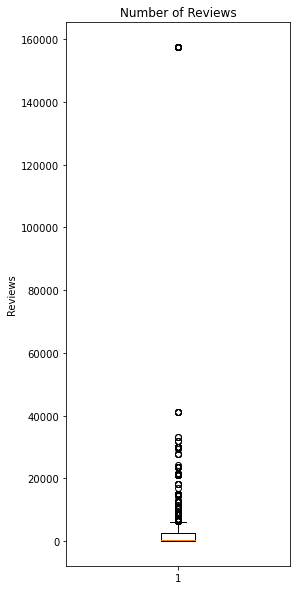

In [78]:
reviews = suzy_col.loc[suzy_col['No_of_Reviews']!= 0, 'No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews')
ax1.set_ylabel('Reviews')
fig1.set_size_inches(4, 10)
ax1.boxplot(reviews)

# Saving figure
# plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()

# Data Exploration & Analysis on Clean Data

In [2]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read Clean Indeed Dataset and store into Pandas data frame
clean_indeed_df = pd.read_csv("./Indeed Data Set.csv")
clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0.0,0,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,4,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,0.0,0,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,4,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


In [4]:
test = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 100)]
test['No_of_Stars'].value_counts()

4    2813
3     227
5       1
Name: No_of_Stars, dtype: int64

In [5]:
# Checking columns
clean_indeed_df.columns

Index(['Job_Title', 'Queried_Salary', 'Job_Type', 'Skill', 'No_of_Skills',
       'Company', 'No_of_Reviews', 'No_of_Stars', 'Location',
       'Company_Revenue', 'Company_Employees', 'Company_Industry', 'python',
       'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC',
       'NC', 'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [6]:
# Filtering data to keep those above 1,000 reviews
indeed_df_500 = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 500)]
indeed_df_500

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
9,Data Scientist,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4,MO,Missing,...,0,0,0,1,0,0,0,0,0,1
10,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
11,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
17,Data Scientist,<80000,data_scientist,"['Microsoft SQL Server', 'Data Mining', 'Machi...",12,Deloitte,7197.0,4,VA,Missing,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,"Sr. Director, Data Engineering",>160000,data_engineer,"['SOX', 'Machine Learning', 'PCI', 'Leadership...",6,Capital One,6791.0,4,VA,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0
5704,"Senior Data Engineer (Java, Hadoop)",>160000,data_engineer,"['Linux', 'Hive', 'Data Management', 'Hadoop',...",14,JPMorgan Chase,21159.0,4,NJ,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


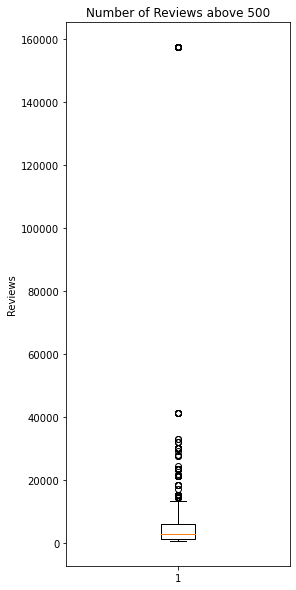

In [7]:
reviews = indeed_df_500['No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews above 500')
ax1.set_ylabel('Reviews')
fig1.set_size_inches(4, 10)
ax1.boxplot(reviews)

# Saving figure
# plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()

In [8]:
indeed_df_500['No_of_Stars'].value_counts()


4    2069
3     131
5       1
Name: No_of_Stars, dtype: int64

In [9]:
# Checking the number of records falling under each job type
indeed_df_500['Job_Type'].value_counts()

data_scientist    1054
data_analyst       608
data_engineer      539
Name: Job_Type, dtype: int64

In [10]:
# Grouping by Job Type
groupby_job_type = indeed_df_500.groupby('Job_Type')

# Checking the number of reviews in each group
sum_reviews_by_job_type = groupby_job_type['No_of_Reviews'].sum()
print(sum_reviews_by_job_type)

# Creating division
print('--------------------------------')

# What is the average stars by job type
mean_star_by_job_type = groupby_job_type['No_of_Stars'].mean()
mean_star_by_job_type 

Job_Type
data_analyst       3505092.0
data_engineer      3459327.0
data_scientist    13251319.0
Name: No_of_Reviews, dtype: float64
--------------------------------


Job_Type
data_analyst      3.896382
data_engineer     3.949907
data_scientist    3.962049
Name: No_of_Stars, dtype: float64

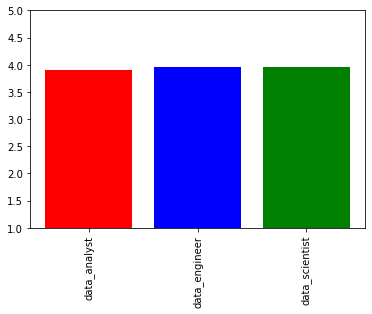

In [36]:
# Job Type Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
job_type = [value for value in mean_star_by_job_type]
x_axis_job = np.arange(len(mean_star_by_job_type))# Determine number of bars needed
tick_locations_job = [value for value in x_axis_job] # to tell the plot where to place tick marks

# Bar Chart
plt.bar(x_axis_job, job_type, color=['r', 'b', 'g'], alpha=1,  align="center")
plt.xticks(tick_locations_job, mean_star_by_job_type.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Job Type vs Company Ratings.png")

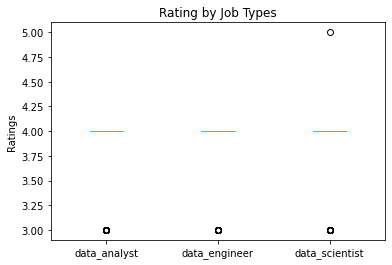

In [12]:
# Create a boxplot to compare means
job_types = ['data_analyst', 'data_engineer', 'data_scientist']
rates = []
data = []

#Setting up plot
fig1, ax1 = plt.subplots()
ax1.set_title('Rating by Job Types')
ax1.set_ylabel('Ratings')

for job in job_types:
    job_df = indeed_df_500.loc[indeed_df_500['Job_Type'] == job]
    rates.append(job_df['No_of_Stars'])
    rat = rates
    data.append(rat)
    rates = []
    
# Extracting from list fro boxplot
x1 = data[0]
x2 = data[1]
x3 = data[2]

# Convert to array source: https://www.educative.io/edpresso/how-to-convert-a-list-to-an-array-in-python
ax1.boxplot([np.array(x1[0]), np.array(x2[0]), np.array(x3[0])], labels = job_types)

# Showing image
plt.show()

In [13]:
data

[[2552    4
  2554    4
  2555    4
  2558    4
  2561    4
         ..
  4324    4
  4325    4
  4326    4
  4328    4
  4329    3
  Name: No_of_Stars, Length: 608, dtype: int64],
 [4336    4
  4340    4
  4344    4
  4346    4
  4347    4
         ..
  5701    4
  5704    4
  5712    4
  5713    4
  5714    4
  Name: No_of_Stars, Length: 539, dtype: int64],
 [0       3
  9       4
  10      4
  11      4
  17      4
         ..
  2473    4
  2477    4
  2478    4
  2506    3
  2541    4
  Name: No_of_Stars, Length: 1054, dtype: int64]]

In [16]:
# Grouping by Company Industry
groupby_industry = indeed_df_500.groupby('Company_Industry')

# Checking the number of reviews in each group
sum_reviews_by_industry = groupby_industry['No_of_Reviews'].sum()
sum_reviews_by_industry = sum_reviews_by_industry.drop("Not Listed")
print(sum_reviews_by_industry)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_industry = groupby_industry['No_of_Stars'].mean()
mean_star_by_industry = mean_star_by_industry.drop("Not Listed")
print(mean_star_by_industry)

Company_Industry
Aerospace and Defense                                   255394.0
Agriculture and Extraction                               23892.0
Auto                                                     87401.0
Banks and Financial Services                           2676552.0
Computers and Electronics                               254123.0
Construction                                             12491.0
Consulting and Business Services                       2826319.0
Consumer Goods and Services                             190953.0
Education and Schools                                    51905.0
Energy and Utilities                                     30965.0
Food and Beverages                                       90234.0
Food and BeveragesConsulting and Business Services       13098.0
Government                                                8414.0
Health Care                                             426994.0
Industrial Manufacturing                                311391.0
Industri

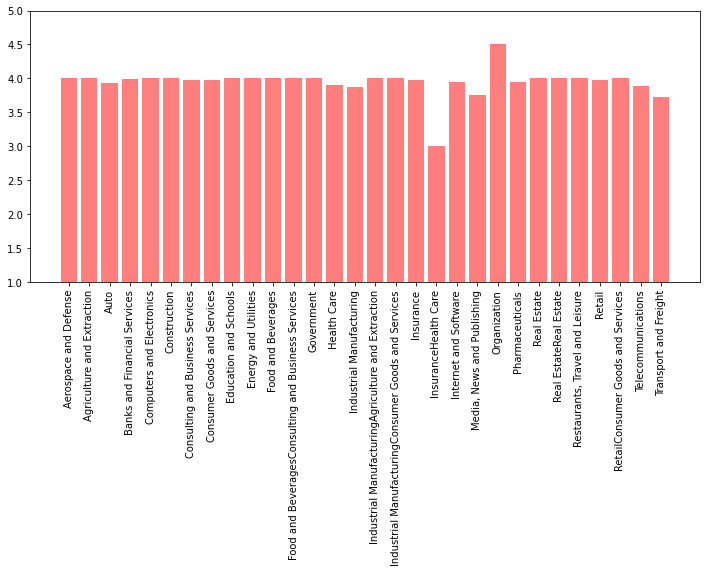

In [37]:
# Industry Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
industry = [value for value in mean_star_by_industry]
x_axis_in = np.arange(len(mean_star_by_industry))# Determine number of bars needed
tick_locations_in = [value for value in x_axis_in] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_in, industry, color='r', alpha=0.5, align="center")
plt.xticks(tick_locations_in, mean_star_by_industry.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Industry vs Company Ratings.png")

In [18]:
# Grouping by Location
groupby_location = indeed_df_500.groupby('Location')

# Checking the number of reviews in each group
sum_reviews_by_location = groupby_location['No_of_Reviews'].sum()
sum_reviews_by_location = sum_reviews_by_location.drop('Missing')
print(sum_reviews_by_location)


# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_location = groupby_location['No_of_Stars'].mean()
mean_star_by_location = mean_star_by_location.drop('Missing')
print(mean_star_by_location)


Location
AL           8811.0
AR        2694419.0
AZ         208611.0
CA        7396382.0
CO         187872.0
CT         204886.0
DC         237150.0
DE         200559.0
FL         189837.0
GA         685675.0
HI           3466.0
IA         106656.0
ID          12060.0
IL         508411.0
IN          48010.0
KS          17377.0
KY          22220.0
LA           3868.0
MA         364507.0
MD         139466.0
ME            923.0
MI          88637.0
MN         218860.0
MO          94185.0
NC         415932.0
NE           6188.0
NH           3021.0
NJ         523570.0
NM           1134.0
NV          21194.0
NY        1440568.0
OH         336647.0
OR         163879.0
PA         233465.0
REMOTE       3293.0
RI           4685.0
SC          97331.0
TN         113413.0
TX        1642591.0
USA        402816.0
UT          13204.0
VA         629288.0
WA         451185.0
WI          60454.0
WY           4479.0
Name: No_of_Reviews, dtype: float64
-------------------------------------------------------

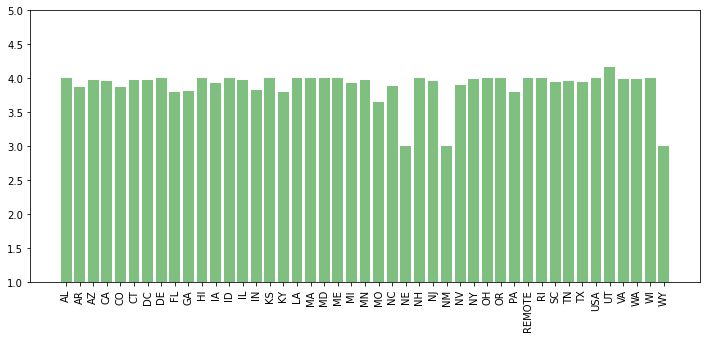

In [38]:
# Location Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
location = [value for value in mean_star_by_location]
x_axis_l = np.arange(len(mean_star_by_location))# Determine number of bars needed
tick_locations_l = [value for value in x_axis_l] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_l, location, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations_l, mean_star_by_location.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Location vs Company Ratings.png")

In [26]:
# Grouping by Salary
groupby_salary = indeed_df_500.groupby('Queried_Salary')

# Checking the number of reviews in each group
sum_reviews_by_salary = groupby_salary['No_of_Reviews'].sum()
sum_reviews_by_salary = sum_reviews_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
print(sum_reviews_by_salary)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_salary = groupby_salary['No_of_Stars'].mean()
mean_star_by_salary = mean_star_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
print(mean_star_by_salary)

Queried_Salary
<80000            768121.0
80000-99999      2626796.0
100000-119999    4968094.0
120000-139999    5438718.0
140000-159999    5096621.0
>160000          1317388.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Queried_Salary
<80000           3.853061
80000-99999      3.891738
100000-119999    3.946602
120000-139999    3.975221
140000-159999    3.981013
>160000          3.971698
Name: No_of_Stars, dtype: float64


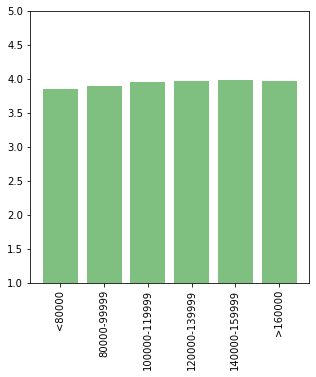

In [39]:
# Salary Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
salary = [value for value in mean_star_by_salary]
x_axis_sal = np.arange(len(mean_star_by_salary))# Determine number of bars needed
tick_loc_sal = [value for value in x_axis_sal] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_sal, salary, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_sal, mean_star_by_salary.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Position Salary Range vs Company Ratings.png")

In [15]:
# Grouping by Employees
groupby_employee = indeed_df_500.groupby('Company_Employees')

# Checking the number of reviews in each group
sum_reviews_by_employee = groupby_employee['No_of_Reviews'].sum()
sum_reviews_by_employee = sum_reviews_by_employee.drop('missing')
print(sum_reviews_by_employee)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_employee = groupby_employee['No_of_Stars'].mean()
mean_star_by_employee = mean_star_by_employee.drop('missing')
print(mean_star_by_employee)

Company_Employees
10,000+             18857620.0
Less than 10,000      196366.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Employees
10,000+             3.967064
Less than 10,000    3.731579
Name: No_of_Stars, dtype: float64


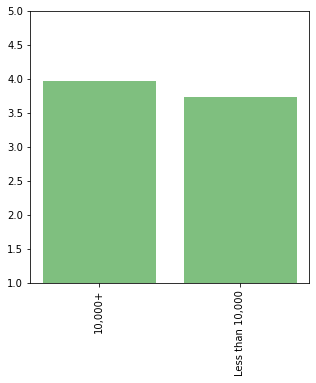

In [40]:
# Employee Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
employee = [value for value in mean_star_by_employee]
x_axis_emp = np.arange(len(mean_star_by_employee))# Determine number of bars needed
tick_loc_emp = [value for value in x_axis_emp] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_emp, employee, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_emp, mean_star_by_employee.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Number of Company Employees vs Company Ratings.png")

In [35]:
# Grouping by Revenue
groupby_revenue = indeed_df_500.groupby('Company_Revenue')

# Checking the number of reviews in each group
sum_reviews_by_revenue = groupby_revenue['No_of_Reviews'].sum()
sum_reviews_by_revenue =  sum_reviews_by_revenue.drop("Missing")
sum_reviews_by_revenue = sum_reviews_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
print(sum_reviews_by_revenue)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_revenue = groupby_revenue['No_of_Stars'].mean()
mean_star_by_revenue = mean_star_by_revenue.drop("Missing")
mean_star_by_revenue = mean_star_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
print(mean_star_by_revenue)

Company_Revenue
Less than $1B (USD)        41275.0
$1B to $5B (USD)          183832.0
$5B to $10B (USD)         759992.0
More than $10B (USD)    15745692.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Revenue
Less than $1B (USD)     3.916667
$1B to $5B (USD)        3.848000
$5B to $10B (USD)       3.877676
More than $10B (USD)    3.973869
Name: No_of_Stars, dtype: float64


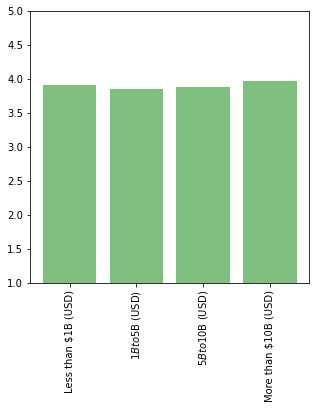

In [41]:
# Revenue Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
revenue = [value for value in mean_star_by_revenue]
x_axis_rev = np.arange(len(mean_star_by_revenue))# Determine number of bars needed
tick_loc_rev = [value for value in x_axis_rev] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_rev, revenue, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_rev, mean_star_by_revenue.index.values, rotation="vertical")
plt.ylim([1,5])

# Saving figure
plt.savefig("./Company Revenue vs Company Ratings.png")